In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)

In [6]:
df = pd.read_csv("Advertising Budget and Sales.csv")
df.head(5)

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [8]:
df = df.drop(columns=['Unnamed: 0'])
df.head(1)

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1


In [10]:
df.rename(columns={
    'TV Ad Budget ($)': 'TV',
    'Radio Ad Budget ($)': 'Radio',
    'Newspaper Ad Budget ($)': 'Newspaper',
    'Sales ($)': 'Sales'
}, inplace=True)


In [12]:
num = list(df.select_dtypes(include=['int64','float64']).keys())
print("Numerical variables are:", num)
print("------------------------------------")
#categorical variables
cat = list(df.select_dtypes(include=['object']).keys())
print("Categorical variables are:", cat)

Numerical variables are: ['TV', 'Radio', 'Newspaper', 'Sales']
------------------------------------
Categorical variables are: []


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [16]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


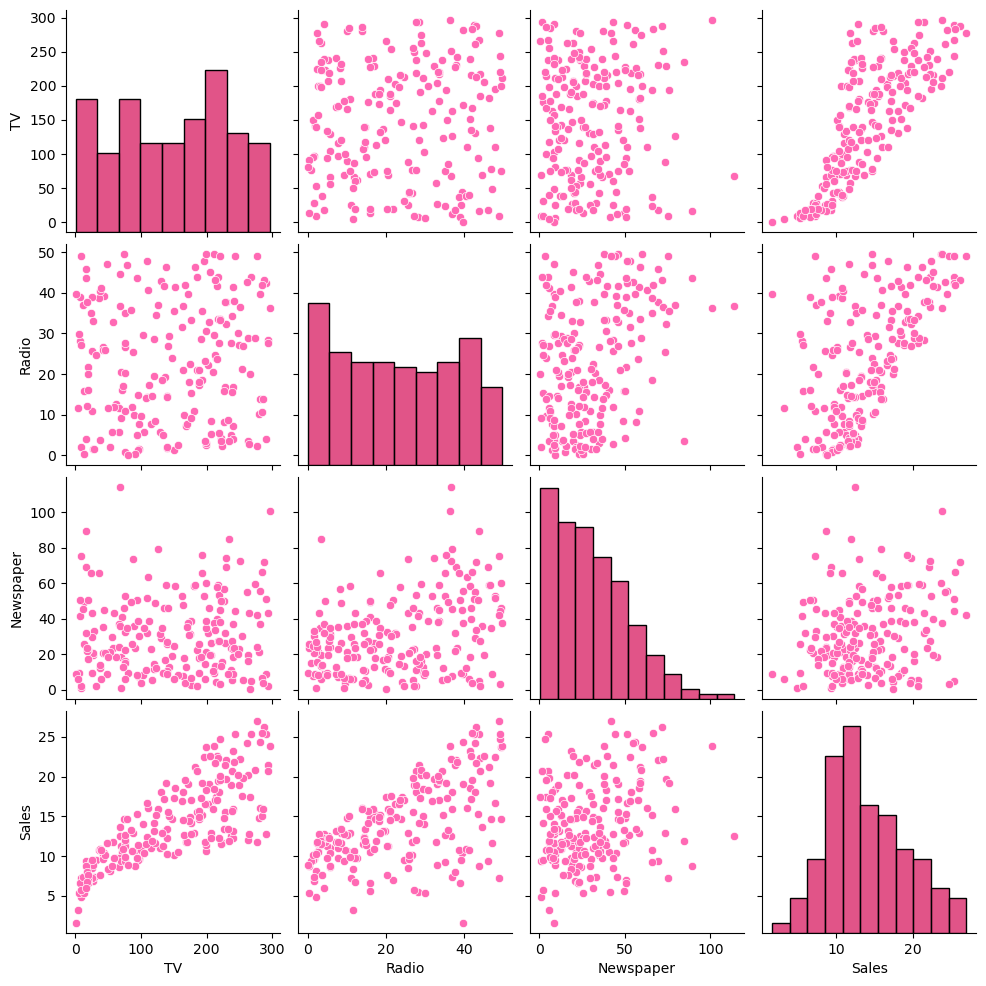

In [18]:
sns.pairplot(df,
             plot_kws={'color': '#ff69b4'},
             diag_kws={'color': '#D81B60'})

Text(0.5, 1.0, 'Correlation Heatmap')

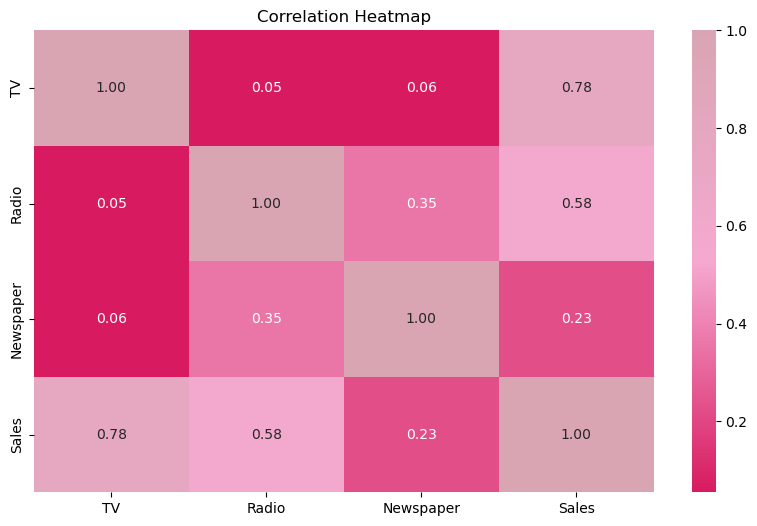

In [20]:
from matplotlib.colors import LinearSegmentedColormap
correlation_matrix = df.corr()
pink_purple_cmap = LinearSegmentedColormap.from_list("pink_purple_cmap", ["#D81B60", "#F5A9D0", "#D9A5B3"])
sns.heatmap(correlation_matrix, annot=True, cmap=pink_purple_cmap, fmt=".2f")
plt.title("Correlation Heatmap")

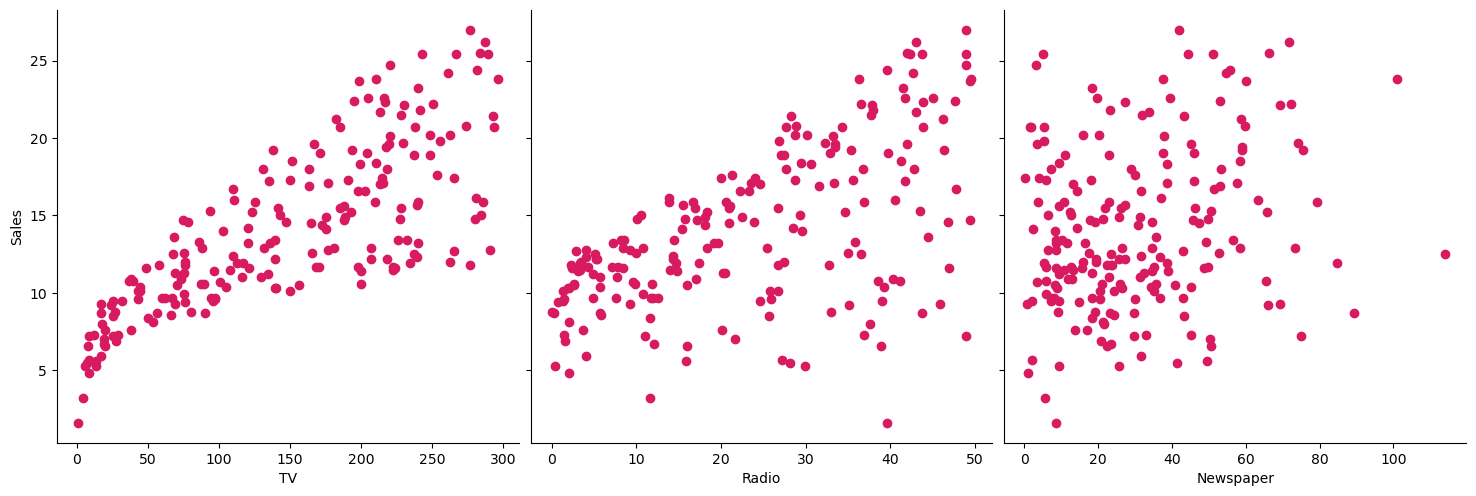

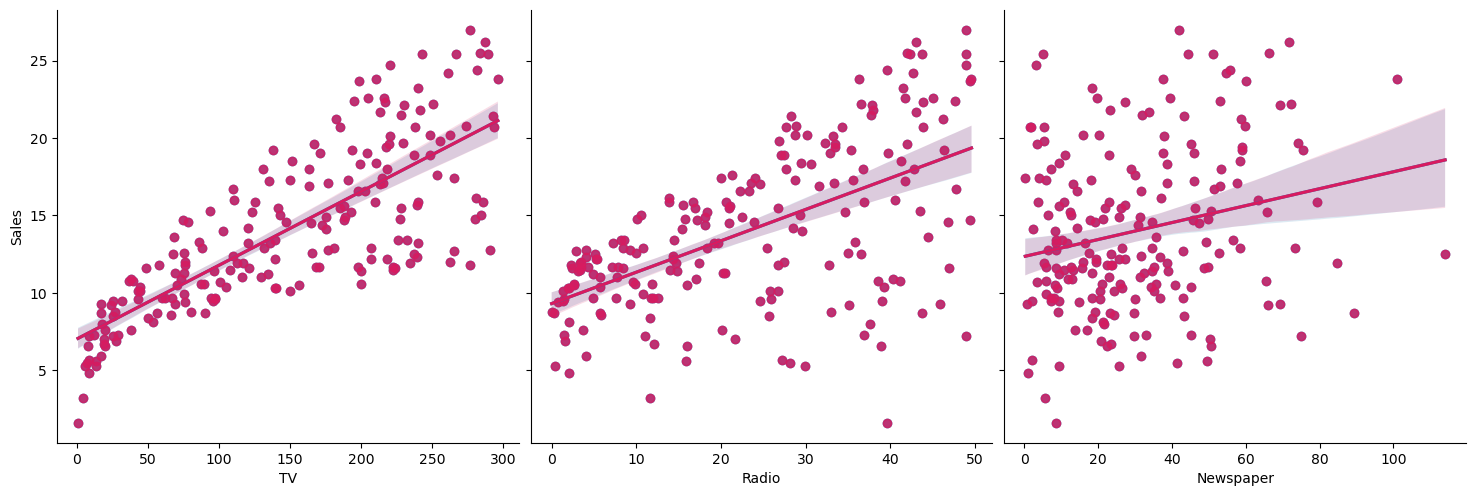

In [22]:
g = sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales',
                 height=5, aspect=1)
for ax in g.axes.flat:
    ax.scatter(df[ax.get_xlabel()], df['Sales'], color='#D81B60')

# Regression plot
g = sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales',
                 height=5, aspect=1, kind='reg')
for ax in g.axes.flat:
    sns.regplot(x=ax.get_xlabel(), y='Sales', data=df, ax=ax, scatter_kws={'color': '#D81B60'}, line_kws={'color': '#D81B60'})

In [24]:
X = df.drop(columns ="Sales") #TV, radio, newspaper = features
y = df["Sales"] #sales= target

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [30]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (160, 3)
Train target shape   :  (160,)
Test features shape  :  (40, 3)
Test target shape    :  (40,)


In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [36]:
print("The model coefficients: ", model.coef_)
#The starting value of the prediction when all feature values are zero.
print("The intercept (bisas) is:",model.intercept_)

The model coefficients:  [0.04472952 0.18919505 0.00276111]
The intercept (bisas) is: 2.979067338122629


In [38]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}
df_compare = pd.DataFrame(my_dict)
df_compare

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, '95'),
  Text(1, 0, '15'),
  Text(2, 0, '30'),
  Text(3, 0, '158'),
  Text(4, 0, '128'),
  Text(5, 0, '115'),
  Text(6, 0, '69'),
  Text(7, 0, '170'),
  Text(8, 0, '174'),
  Text(9, 0, '45'),
  Text(10, 0, '66'),
  Text(11, 0, '182'),
  Text(12, 0, '165'),
  Text(13, 0, '78'),
  Text(14, 0, '186'),
  Text(15, 0, '177'),
  Text(16, 0, '56'),
  Text(17, 0, '152'),
  Text(18, 0, '82'),
  Text(19, 0, '68'),
  Text(20, 0, '124'),
  Text(21, 0, '16'),
  Text(22, 0, '148'),
  Text(23, 0, '93'),
  Text(24, 0, '65'),
  Text(25, 0, '60'),
  Text(26, 0, '84'),
  Text(27, 0, '67'),
  Text(28, 0, '125'),
  Text(29, 0, '132'),
  Text(30, 0, '9'),
  Text(31, 0, '18'),
  Text(32, 0, '55'),
  Text(33, 0, '75'),
  Text(34, 0, '150'),
  Text(35, 0, '104'),
  Text(36, 0, '135'),
  Text(37, 0, '137'),
  Text(38

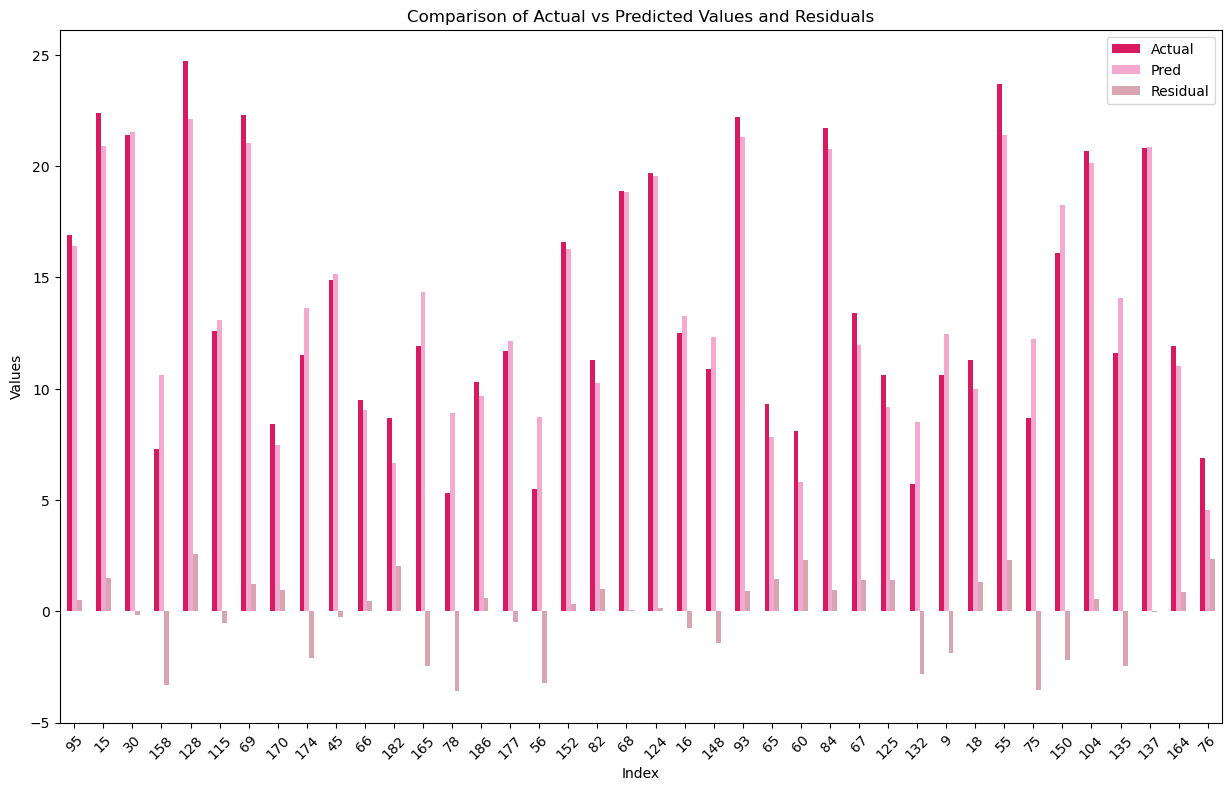

In [40]:
df_compare.plot(kind="bar", figsize=(15, 9), color=["#D81B60", "#F5A9D0", "#D9A5B3"])
plt.title('Comparison of Actual vs Predicted Values and Residuals')
plt.xlabel('Index')
plt.ylabel('Values')
plt.xticks(rotation=45)

In [44]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
# Calculate R^2 Score
r2_score_value = r2_score(y_test, y_pred)
print(f"R^2 Score: {r2_score_value}")
# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

R^2 Score: 0.899438024100912
Mean Absolute Error (MAE): 1.4607567168117606
Mean Squared Error (MSE): 3.1740973539761046
Root Mean Squared Error (RMSE): 1.7815996615334502
